# Decision Tree Implementation
### I have implemented the actual tree using object oriented programming

In [167]:
import pandas as pd
import numpy as np
import math
from sklearn import datasets
from sklearn.model_selection import train_test_split

## After importing useful modules, we will clean data, here I am changing the class names to integer values.
### Iris-setosa as 0
### Iris-virginica as 1
### Iris-versicolor as 2

In [168]:
data=pd.read_csv("Iris.csv")
def getclass(str):
    if(str=="Iris-setosa"):
        return 0
    elif(str=="Iris-virginica"):
        return 1
    else:
        return 2
data["species"]=data["Species"].apply(getclass)
del data["Species"]
del data["Id"]
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


### Here we will define functions to change continuous valued data to specific vales
#### We have divided the continuous values into 4 classes based on the averages

In [169]:
def define(val,*mean):
    if(val<mean[0]):
        return 1
    if(val>=mean[0] and val<mean[1]):
        return 2
    if(val>=mean[1] and val<mean[2]):
        return 3
    else:
        return 4
    
def change(data,feature):
    minimum=data[feature].min()
    maximum=data[feature].max()
    mean1=(minimum+maximum)/2
    mean2=(minimum+mean1)/2
    mean3=(mean1+maximum)/2
    return data[feature].apply(define,args=(mean2,mean1,mean3))

### Here I am changing the values of the columns to 
### sl = Sepal Length
### sw = Sepal Width
### pl = petal lenght
### pw = petal width

In [170]:
data['sl']=change(data,'SepalLengthCm')
data['sw']=change(data,'SepalWidthCm')
data['pl']=change(data,'PetalLengthCm')
data['pw']=change(data,'PetalWidthCm')
data.drop(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], axis = 1, inplace = True)
data

,species,sl,sw,pl,pw
0,0,1,3,1,1
1,0,1,2,1,1
2,0,1,3,1,1
3,0,1,2,1,1
4,0,1,3,1,1
...,...,...,...,...,...
145,1,3,2,3,4
146,1,3,1,3,4
147,1,3,2,3,4
148,1,3,3,3,4


### Here I have converted the values to arrays to split upon and unltimately pass to the classifier

In [171]:
#data1=data.to_numpy()
#X=data1[:,1:5]
X1=data.iloc[:,1:]
Y1=data.iloc[:,0]
del data['species']
#features={sl,sw,pl,pw}
#X=data

In [172]:
X=X1.values
Y=Y1.values
Y.shape

(150,)

## Declaration of TreeNode class

In [173]:
class TreeNode:
    def __init__(self,data,output):
        self.data=data
        self.children={} ## Children declared as dictionary
        self.output=output ## Output that will be printed
        self.index=-1
    
    ## Function to add the node of child class to the dictionary
    def addchild(self,feature,object):
        self.children[feature]=object ## Storing the node with key as the unique value of the feature where the node is split

## Building of Decision Tree Classifier through OOPs

In [174]:
class DecisionTree:
    ##Constructor
    def __init__(self):
        self.__root=None
    
    ##To calculate the count of classes
    def __freqcounter(self,Y):
        d={}
        for i in Y:
            if i in d:
                d[i]+=1
            else:
                d[i]=1
        return d
    
    ###Calculates the entropy of the node
    def __entropy(self,Y):
        freqmp=self.__freqcounter(Y)
        entropy=0
        totallen=len(Y)
        for i in freqmp:
            p=freqmp[i]/totallen
            entropy+= (-p)*math.log2(p)
        return entropy  
    
    ###Calculates the gain ratio for teh specifin feature
    def __gainratio(self,X,Y,feature):
        entropybefore=self.__entropy(Y)
        entropyafter=0
        splitinfo=0
        values=set(X[:,feature])
        data2=pd.DataFrame(X)
        data2[data2.shape[1]]=Y
        ss=data2.shape[0]
        for i in values:
            df=data2[data2[feature]==i]
            cs=df.shape[0]
            entropyafter+=(cs/ss)*self.__entropy(df[df.shape[1]-1]) ##formula to calculate entropy for each value in feature
            splitinfo+=(-cs/ss)*math.log2(cs/ss) ##Formula to calculate split info for each value
        if(splitinfo==0):
            return math.inf
        infogain=entropybefore-entropyafter ##Info Gain formula
        gainratio=infogain/splitinfo ##Gain ratio formula
        return gainratio     
    
    def __DT(self,X,Y,features,level,classes,all_features=np.array([i for i in data.columns])):
        
        ###Base Case
        ## This the case where we are out of features to split upon
        if(len(features)==0):
            print("Level ",level)
            freq=self.__freqcounter(Y)
            output=None
            maxcount=(-1)*math.inf
            for i in classes:
                if i not in freq:
                    print("Count of ",i," = ",0)
                else:
                    if(freq[i]>maxcount):
                        output=i
                        mathcount=freq[i]
                    print("Count of ",i," = ",freq[i])
            print("Current entropy is ",self.__entropy(Y))
            print("Reached Leaf Node")
            print()
            return TreeNode(None,output)
       
        
        ###Base Case
        ## This the case where we have encountered a pure class that there is only 1 class present int the output
        if(len(set(Y))==1):
            print("Level ",level)
            output=None
            for class1 in classes:
                if class1 in Y:
                    output=class1
                    print("Count of ",class1," is ",len(Y))
                else:
                    print("Count of ",class1," is ",0)
            print("Current entropy is 0.0")
            print("Reached Leaf Node")
            print()
            return TreeNode(None,output)
       
       ##Now the main function begins
       ## Here we are finding the feature with maximum gain ratio
        maxgain=-math.inf
        feature=None
        for f in features:
            currgain=self.__gainratio(X,Y,f)
            if currgain>maxgain:
                maxgain=currgain
                feature=f
        print("Level ",level)
        freq=self.__freqcounter(Y)
        output=None
        maxcount=-math.inf
        
        ##Here we are keeping the count of all the classes and then storing the output with class that has maximum count
        for class1 in classes:
            if class1 not in freq:
                print("Count of ",class1," = ",0)
            else:
                if freq[class1]>maxcount:
                    output=class1
                    maxcount=freq[class1]
                print("Count of ",class1," = ",freq[class1])
        print("Current entropy is ",self.__entropy(Y))
        print("Splitting on feature ",all_features[feature]," with gainratio ", maxgain)
        print()
        
        uniquevalue=set(X[:,feature])
        df=pd.DataFrame(X)
        df[df.shape[1]]=Y
        currnode=TreeNode(feature,output)
        index=features.index(feature)
        features.remove(feature)
        
        ## We are using recursion here to call further nodes based on the unique values of the selected feature with maximum gainratio
        for i in uniquevalue:
            df1=df[df[feature]==i]
            node=self.__DT(df1.iloc[:,0:df1.shape[1]-1].values,df1.iloc[:,df1.shape[1]-1].values,features,level+1,classes)
            currnode.addchild(i,node)
        features.insert(index,feature)
        return currnode
    
    #Function to fit the training data
    def fit(self,X,Y):
        features=[i for i in range(len(X[0]))]
        #features={'sw','sl','pl','pw'}
        classes=set(Y)
        level=0
        self.__root=self.__DT(X,Y,features,level,classes)
        
    #To predict the output of a single instance if data   
    def predictpoint(self,data3,node):
        if(len(node.children)==0):
            return node.output
        val=data3[node.data]
        if val not in node.children:
            return node.output
        return self.predictpoint(data3,node.children[val])
    
    #To predict the output of testing data
    def predict(self,X):
        Y=np.array([0 for i in range(len(X))])
        for i in range(len(X)):
            Y[i]=self.predictpoint(X[i],self.__root)
        return Y
    
    ##To calculate the score
    def score(self,X,Y):
        Y_pred=self.predict(X)
        count=0
        for i in range(len(Y_pred)):
            if Y_pred[i]==Y[i]:
                count+=1
        return count/len(Y_pred)        

### Testing our algorithm
### Step1: Training the algorithm
### Step 2: Testing it

In [175]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y) #Splitting data into test and train
clf=DecisionTree()
clf.fit(X_train,Y_train) #Training the data
print()
print("Score",clf.score(X_test,Y_test)) #Printing the score 


Level  0
Count of  0  =  33
Count of  1  =  38
Count of  2  =  41
Current entropy is  1.5792666752805806
Splitting on feature  pw  with gainratio  0.6789116121665374

Level  1
Count of  0  is  33
Count of  1  is  0
Count of  2  is  0
Current entropy is 0.0
Reached Leaf Node

Level  1
Count of  0  is  0
Count of  1  is  0
Count of  2  is  11
Current entropy is 0.0
Reached Leaf Node

Level  1
Count of  0  =  0
Count of  1  =  11
Count of  2  =  30
Current entropy is  0.8390040613676977
Splitting on feature  pl  with gainratio  0.3965194858647163

Level  2
Count of  0  is  0
Count of  1  is  0
Count of  2  is  2
Current entropy is 0.0
Reached Leaf Node

Level  2
Count of  0  =  0
Count of  1  =  5
Count of  2  =  28
Current entropy is  0.6136190195993708
Splitting on feature  sl  with gainratio  0.07997243836936897

Level  3
Count of  0  is  0
Count of  1  is  1
Count of  2  is  0
Current entropy is 0.0
Reached Leaf Node

Level  3
Count of  0  =  0
Count of  1  =  1
Count of  2  =  12
Cur

### Finally getting a score of 0.921 approx

### Now we are going to generate pdf images for OR tree as well as the tree for IRIS dataset

In [184]:
##Importing useful Modules
from sklearn.tree import export_graphviz
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [183]:
##Creating the pdf for IRIS tree
##Using inbuilt classifier
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 1)
clf1=DecisionTreeClassifier()
clf1.fit(x_train,y_train)

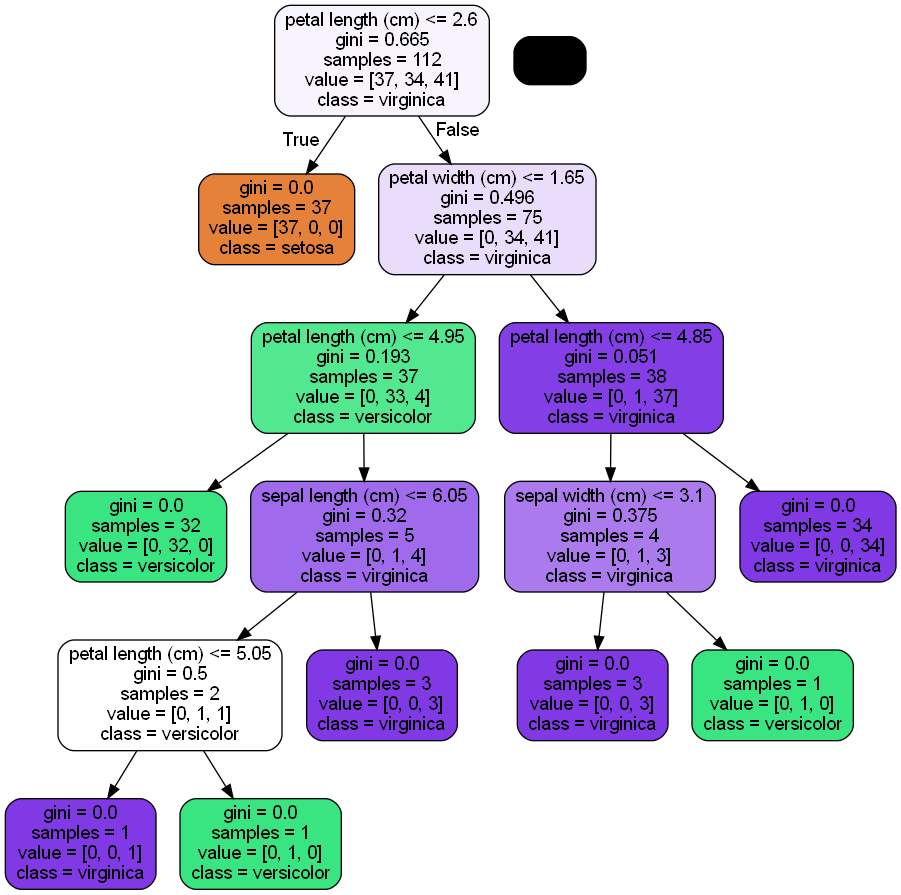

In [178]:
## Using graphviz and pydotplus to create pdf
dot_data = export_graphviz(clf1, out_file=None,
                          feature_names=iris.feature_names,
                          class_names=iris.target_names, filled=True, rounded=True)
import pydotplus
from IPython.display import Image 
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("Iris_tree.pdf")
Image(graph.create_png())
### Pdf is attached in the zip file

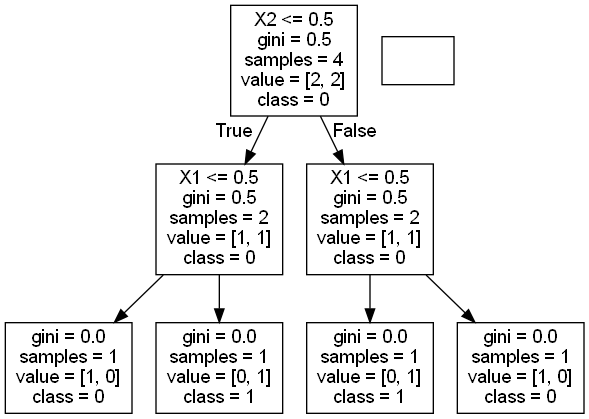

In [180]:
## Creating pdf for OR tree using inbuilt classifier
data7 = [[False ,False , False],
          [False ,True , True],
          [True ,False , True],
          [True ,True , False]]
df3 = pd.DataFrame(data7, columns = ["X1", "X2", "Y(X1 OR X2)"])
x_train = df3.iloc[:, 0:2]
y_train = df3.iloc[:, 2]
clf2 = DecisionTreeClassifier()
clf2.fit(x_train, y_train)
dot_data = export_graphviz(clf2, out_file = None,
                          feature_names = ["X1", "X2"],
                          class_names = ["0", "1"])

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("OR_tree1.pdf")
Image(graph.create_png())
### Pdf is attached in the zip file                